In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import isbnlib 

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike_hour_data = pd.read_csv("day.csv")

In [4]:
bike_copy = bike_hour_data.copy()

In [5]:
bike_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### EDA

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas_profiling

In [7]:
bike_copy.profile_report()

In [8]:
bike_copy['dteday']= pd.to_datetime(bike_copy['dteday'])

In [9]:
bike_copy.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

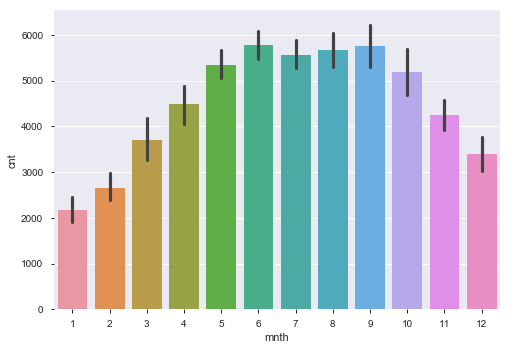

In [10]:
sns.barplot(x='mnth', y='cnt', data = bike_copy)

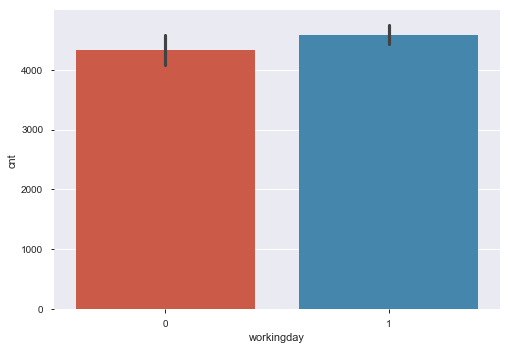

In [11]:
sns.barplot(x='workingday', y='cnt', data= bike_copy)

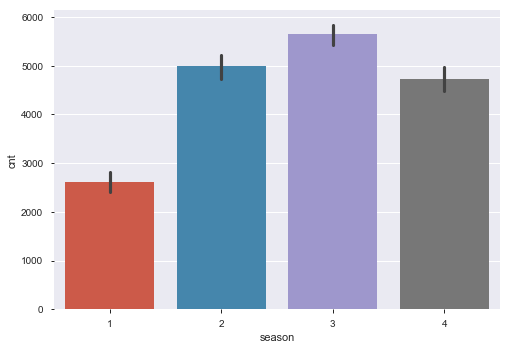

In [12]:
sns.barplot(x='season', y='cnt', data= bike_copy)

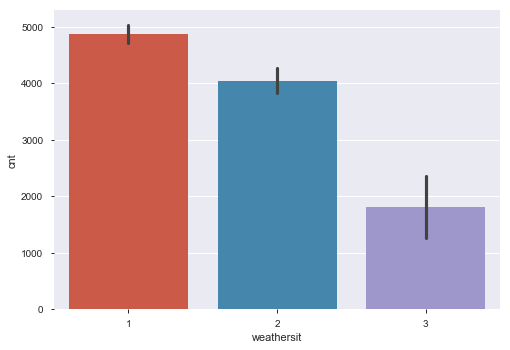

In [13]:
sns.barplot(x='weathersit', y='cnt', data= bike_copy)

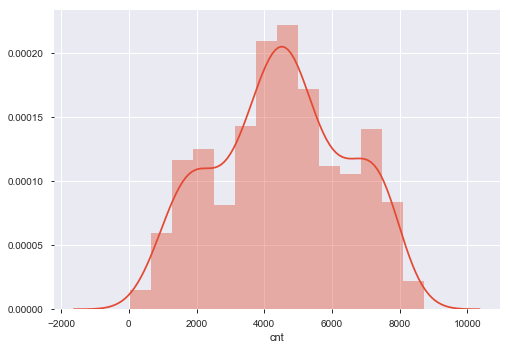

In [14]:
sns.distplot(bike_copy['cnt'])

In [15]:
bike_copy.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [16]:
cat_attr = ['season','yr','mnth','holiday','workingday','weathersit','weekday']

In [17]:
def convert_to_categorical(dataset,col_names_to_convert):
    """This function converts the given list of columns to categorical columns.
    Attributes : 
        dataset: variable name with the dataset
        col_names_to_convert: list of column names that are to be converted to categorical format
    Returns:
        dataset with the converted columns.
    """
    for i in col_names_to_convert:
        try:
            dataset[i] = dataset[i].astype('category')
        except:
            print(f"Failed to convert the column {i}")
    return(dataset)

In [18]:
bike_copy = convert_to_categorical(bike_copy, col_names_to_convert=cat_attr)

In [19]:
bike_copy.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [20]:
bike_copy.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
bike_copy.shape

(731, 16)

In [22]:
bike_drop_new = bike_copy.copy()

In [23]:
bike_drop_new.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)

In [24]:
bike_dummies = pd.get_dummies(data=bike_drop_new, columns=['season','yr','mnth','holiday','weekday','workingday','weathersit'], drop_first=True, )

In [25]:
bike_dummies.shape

(731, 30)

In [26]:
bike_dummies.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837,0.251710,0.257182,0.243502,0.500684,0.077975,...,0.028728,0.143639,0.142271,0.142271,0.142271,0.142271,0.143639,0.683995,0.337893,0.028728
std,0.183051,0.162961,0.142429,0.077498,1937.211452,0.434293,0.437380,0.429489,0.500342,0.268316,...,0.167155,0.350963,0.349567,0.349567,0.349567,0.349567,0.350963,0.465233,0.473316,0.167155
min,0.059130,0.079070,0.000000,0.022392,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


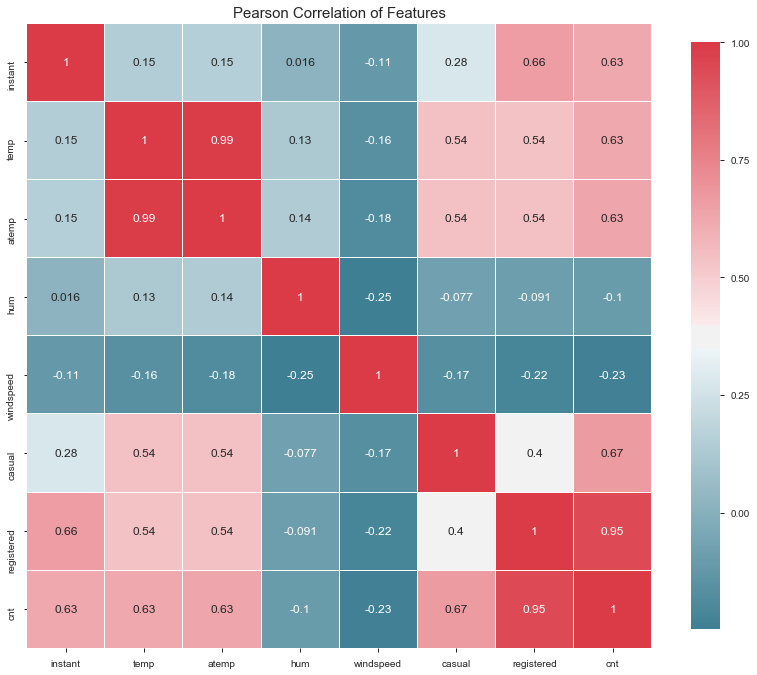

In [87]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(bike_copy)

#### Creating Train/Test split data.

In [30]:
from sklearn.model_selection import train_test_split

In [43]:
x = bike_dummies.drop('cnt', axis=1)
y = bike_dummies.cnt

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1, train_size=0.7)

In [50]:
print("The shape of the train dataset: __{}__ ".format(x_train.shape))

print("The shape of the test dataset __{}__ ".format(x_test.shape))

print("y_train : {}".format(y_train.shape))

print("y_test : {} ".format(y_test.shape))

The shape of the train dataset: __(511, 29)__ 
The shape of the test dataset __(220, 29)__ 
y_train : (511,)
y_test : (220,) 


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
#fITTING THE MODEL ON THE TRAINING DATA

linreg = LinearRegression()

linreg.fit(x_train, y_train)

###### MAKING THE PREDICTION ON THE TRAINING SET

In [92]:
pred_train_lr = linreg.predict(x_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#same thing on the test dataset

pred_test_lr = linreg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
print(r2_score(y_test, pred_test_lr))

739.5383742489483
0.8477161276685857
809.7430127220293
0.837032768967465


## Regularized regression models

In [94]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


### Ridge Regression

In [115]:
rr = Ridge(alpha=0.5)
rr.fit(x_train, y_train)
pred_train_rr = rr.predict(x_train)

print("EvaluationMetrics on Train datset")
print(np.sqrt(mean_squared_error(y_train, pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

print("EvaluationMetrics for Test datset")
pred_test_rr = rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

EvaluationMetrics on Train datset
740.6888593275032
0.8472419491627808
EvaluationMetrics for Test datset
814.4704969532768
0.8351243264846244


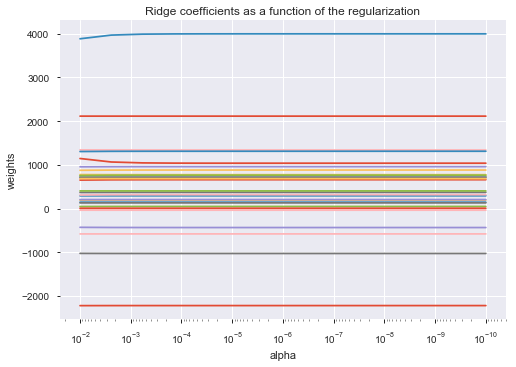

In [128]:
# #############################################################################
# Compute paths
from sklearn.linear_model import LinearRegression
n_alphas = 14
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    
# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### Lasso Regression

In [116]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(x_train, y_train)

lasso_train_model = model_lasso.predict(x_train)
print("EvaluatioMetrics for Train DataSet :\n")
print(np.sqrt(mean_squared_error(y_train, lasso_train_model)))
print(r2_score(y_train, lasso_train_model))

print("EvaluationMetrics for Test dataset: \n")

lasso_test_model = model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, lasso_test_model)))
print(r2_score(y_test, lasso_test_model))

EvaluatioMetrics for Train DataSet :

740.5927062478808
0.8472816073902892
EvaluationMetrics for Test dataset: 

809.2254483259568
0.837241030303238


### Elastic-net

In [121]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

print("Evaluation Metrics for train model: \n")
pred_train_enet= model_enet.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

print("EvaluationMetrics fro test model: \n")
pred_test_enet= model_enet.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

Evaluation Metrics for train model: 

752.4412504399136
0.8423559164238147
EvaluationMetrics fro test model: 

838.6033540118722
0.8252090035181567
